In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Read the CSV file containing Kathmandu air quality measurements into a DataFrame
df = pd.read_csv("kathmandu_pm25_dataset.csv")

print("Length of the dataset: ", len(df), "\n\n")
df.head()

Length of the dataset:  61976 




locationId                                    location       city country  \
0        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
1        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
2        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
3        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
4        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   

                         utc                      local parameter   value  \
0  2021-03-12T18:15:00+00:00  2021-03-13T00:00:00+05:45        o3   0.051   
1  2021-03-12T18:15:00+00:00  2021-03-13T00:00:00+05:45      pm25  69.000   
2  2021-03-12T17:15:00+00:00  2021-03-12T23:00:00+05:45      pm25  69.000   
3  2021-03-12T17:15:00+00:00  2021-03-12T23:00:00+05:45        o3   0.030   
4  2021-03-12T16:15:00+00:00  2021-03-12T22:00:00+05:45        o3   0.030   

    unit   latitude  longitude  
0    ppm  27.712463  85.315704  
1  µg/m³  27.712463  85.315704  
2  µg/m³  27.712463  85.315704  
3    ppm  27.712463  85.315704  
4    ppm  27.712463  85.315704

In [4]:
# Keep only the rows where the 'parameter' column is 'pm25'
# This removes other pollutants if they exist (e.g., o3, etc.)
pm25_df = df[df["parameter"] == "pm25"].copy()

print("Length of the dataset: ", len(pm25_df), "\n\n")
pm25_df.head()

Length of the dataset:  31832 




locationId                                    location       city country  \
1        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
2        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
5        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
6        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
9        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   

                         utc                      local parameter  value  \
1  2021-03-12T18:15:00+00:00  2021-03-13T00:00:00+05:45      pm25   69.0   
2  2021-03-12T17:15:00+00:00  2021-03-12T23:00:00+05:45      pm25   69.0   
5  2021-03-12T16:15:00+00:00  2021-03-12T22:00:00+05:45      pm25   60.0   
6  2021-03-12T15:15:00+00:00  2021-03-12T21:00:00+05:45      pm25   58.0   
9  2021-03-12T14:15:00+00:00  2021-03-12T20:00:00+05:45      pm25   58.0   

    unit   latitude  longitude  
1  µg/m³  27.712463  85.315704  
2  µg/m³  27.712463  85.315704  
5  µg/m³  27.712463  85.315704  
6  µg/m³  27.712463  85.315704  
9  µg/m³  27.712463  85.315704

In [5]:
# Convert 'local' and 'utc' columns from string to datetime objects
# This allows proper time-based operations (resampling, filtering, etc.)
pm25_df["local"] = pd.to_datetime(pm25_df["local"])
pm25_df["utc"] = pd.to_datetime(pm25_df["utc"])
pm25_df.head()

locationId                                    location       city country  \
1        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
2        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
5        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
6        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
9        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   

                        utc                     local parameter  value   unit  \
1 2021-03-12 18:15:00+00:00 2021-03-13 00:00:00+05:45      pm25   69.0  µg/m³   
2 2021-03-12 17:15:00+00:00 2021-03-12 23:00:00+05:45      pm25   69.0  µg/m³   
5 2021-03-12 16:15:00+00:00 2021-03-12 22:00:00+05:45      pm25   60.0  µg/m³   
6 2021-03-12 15:15:00+00:00 2021-03-12 21:00:00+05:45      pm25   58.0  µg/m³   
9 2021-03-12 14:15:00+00:00 2021-03-12 20:00:00+05:45      pm25   58.0  µg/m³   

    latitude  longitude  
1  27.712463  85.315704  
2  27.712463  85.315704  
5  27.712463  85.315704  
6  27.712463  85.315704  
9  27.712463  85.315704

In [6]:
# Remove columns that are not needed for this analysis to simplify the dataset
pm25_df = pm25_df.drop(columns = ["location","city","latitude","longitude","country"])
pm25_df.head()

locationId                       utc                     local parameter  \
1        3460 2021-03-12 18:15:00+00:00 2021-03-13 00:00:00+05:45      pm25   
2        3460 2021-03-12 17:15:00+00:00 2021-03-12 23:00:00+05:45      pm25   
5        3460 2021-03-12 16:15:00+00:00 2021-03-12 22:00:00+05:45      pm25   
6        3460 2021-03-12 15:15:00+00:00 2021-03-12 21:00:00+05:45      pm25   
9        3460 2021-03-12 14:15:00+00:00 2021-03-12 20:00:00+05:45      pm25   

   value   unit  
1   69.0  µg/m³  
2   69.0  µg/m³  
5   60.0  µg/m³  
6   58.0  µg/m³  
9   58.0  µg/m³

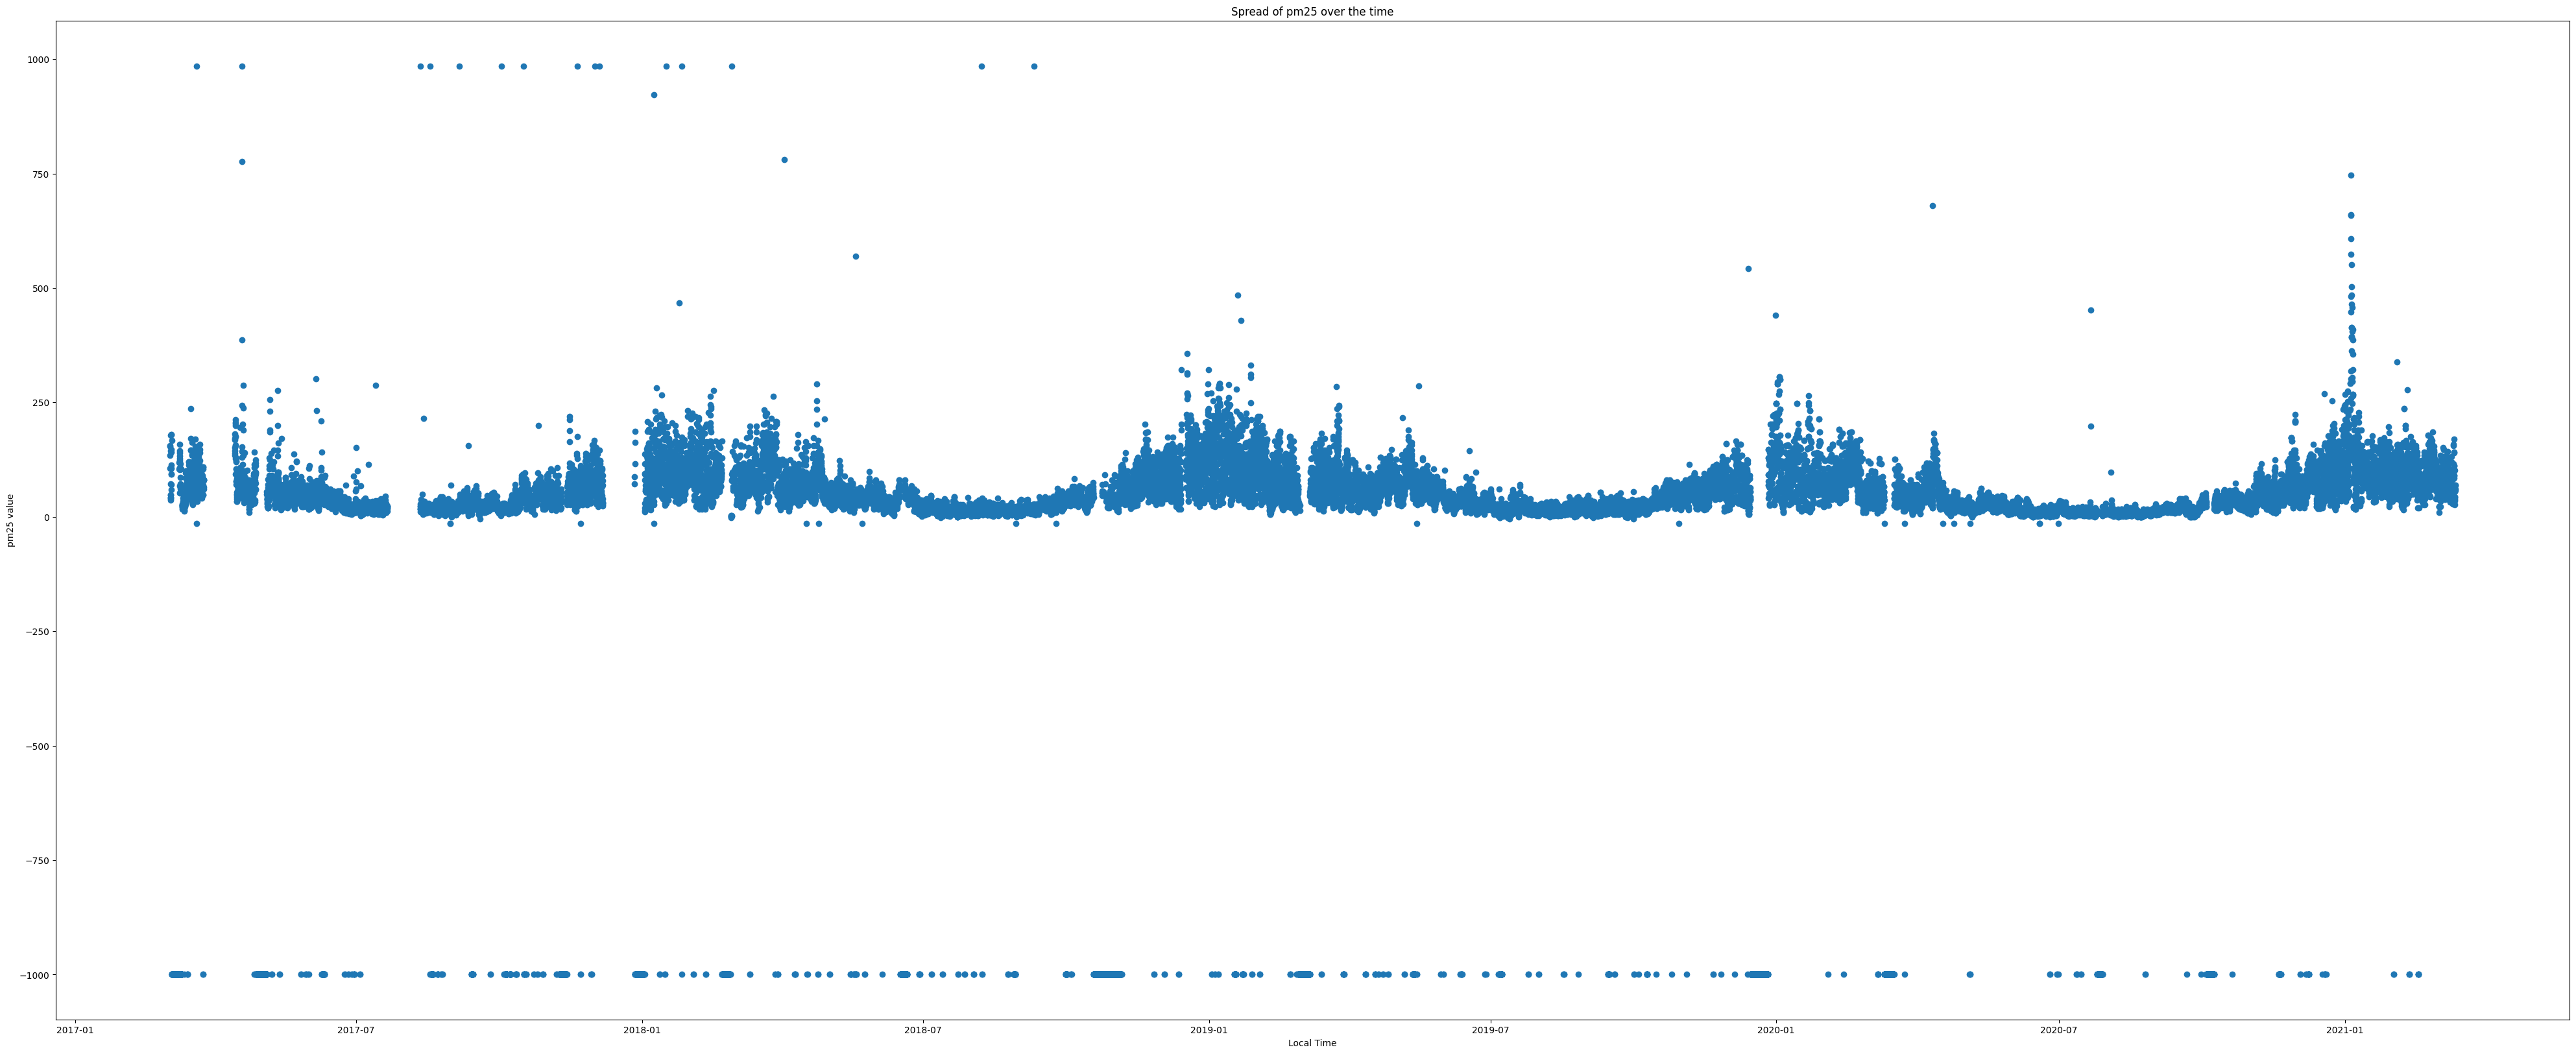

In [7]:
# Create a large scatter plot of PM2.5 values over local time for the full time series
plt.figure(figsize=(50, 20))
plt.scatter(pm25_df["local"],pm25_df["value"])
plt.title("Spread of pm25 over the time")
plt.xlabel("Local Time")
plt.ylabel("pm25 value")
plt.show()


In [8]:
# In reality, PM2.5 levels never drop to zero. 
# Furthermore, there is no historical record of concentrations exceeding $370 µg/m³$ in Kathmandu. 
# Values outside this range are likely sensor errors; therefore, we will treat them as outliers 
# and use backfill (bfill) followed by forward fill (ffill) to impute the missing data.

# Count's how many values are abnormally high (>= 102)
count = (pm25_df["value"] >=102).sum()

# Why 102 and why not 100 ?
# Selected 102 as the upper threshold based on model tuning. While 100 is standard, 
# 102 optimized the r^2 score, preserving valid high-pollution peaks while removing true sensor noise.

print("No of outliers/invalid data in pm25:" ,count)

# Count's how many values are zero or negative (physically impossible for concentration)
negative_pm25_values = (pm25_df["value"] <= 0).sum()
print("No of negative/invalid data in pm25:" ,negative_pm25_values)


No of outliers/invalid data in pm25: 3910
No of negative/invalid data in pm25: 2477


In [9]:
# Total invalid values before replacing them with NaN
print("Total Invalid value count before replacing:  " + str((negative_pm25_values + count)))

# Create a new column that will store cleaned PM2.5 values
pm25_df["clean_value"] = pm25_df["value"].copy()

# Replace clearly invalid values (<= 3 or >= 102) with NaN in 'clean_value'
# These NaNs will later be filled using forward/backward fill
pm25_df.loc[(pm25_df["value"] <= 3) | (pm25_df["value"] >= 102),"clean_value"] = pd.NA

# Count how many NaNs are in the cleaned column
invalid_count = pm25_df["clean_value"].isna().sum()

print("Total count of Nan value in dataframe before removing the nan:" , invalid_count)

print(pm25_df[["local","clean_value","value","parameter"]].head())

Total Invalid value count before replacing:  6387
Total count of Nan value in dataframe before removing the nan: 6692
                      local  clean_value  value parameter
1 2021-03-13 00:00:00+05:45         69.0   69.0      pm25
2 2021-03-12 23:00:00+05:45         69.0   69.0      pm25
5 2021-03-12 22:00:00+05:45         60.0   60.0      pm25
6 2021-03-12 21:00:00+05:45         58.0   58.0      pm25
9 2021-03-12 20:00:00+05:45         58.0   58.0      pm25


In [10]:
# Create a binary flag column where 1 means the sensor is "down" (invalid/NaN clean_value) and 0 means the sensor is working normally
pm25_df["sensor_down"] = pm25_df["clean_value"].isna().astype(int)

print(pm25_df[["local","clean_value","value","parameter","sensor_down"]].sort_values(by="value", ascending=False).head())


                          local  clean_value  value parameter  sensor_down
55115 2017-09-05 11:00:00+05:45          NaN  985.0      pm25            1
49978 2018-01-26 12:00:00+05:45          NaN  985.0      pm25            1
48840 2018-02-27 15:00:00+05:45          NaN  985.0      pm25            1
51369 2017-12-04 10:00:00+05:45          NaN  985.0      pm25            1
51482 2017-12-01 12:00:00+05:45          NaN  985.0      pm25            1


/var/folders/5h/wdf3vc9s0cb3k4pj_zh03f300000gn/T/ipykernel_18542/1190690071.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_downtime = pm25_df.groupby(pm25_df["local"].dt.to_period("M"))["sensor_down"].sum()


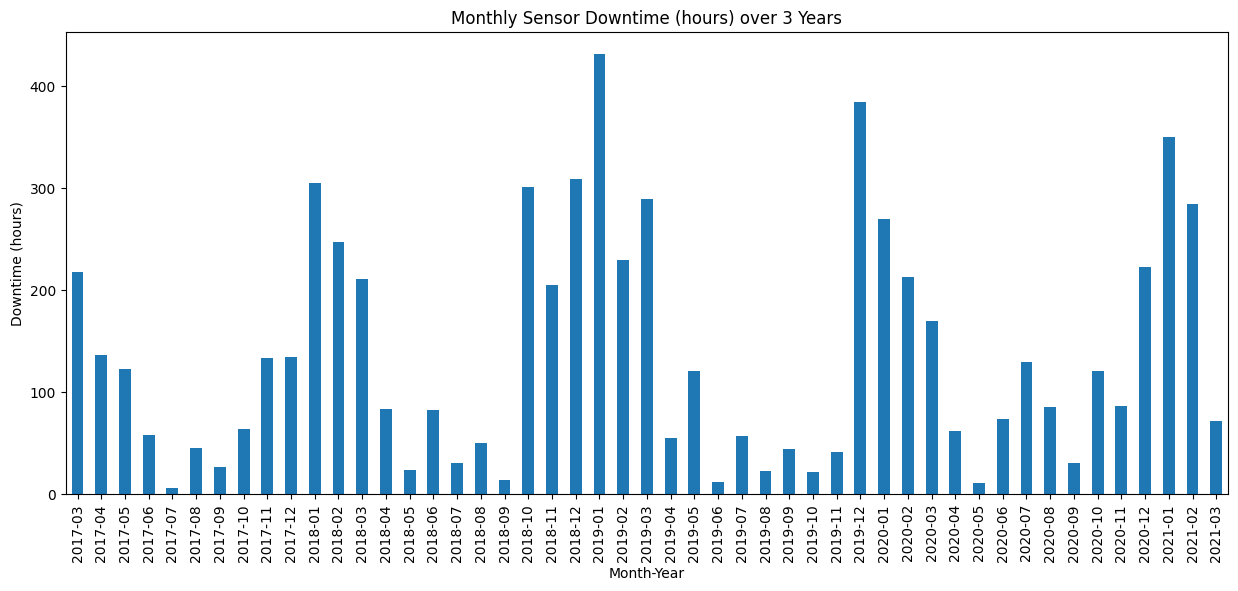

In [11]:
# Group by month (using the 'local' datetime) and sum the sensor_down flags
# Each row represents one hour, so the sum is the total hours of downtime per month
monthly_downtime = pm25_df.groupby(pm25_df["local"].dt.to_period("M"))["sensor_down"].sum()

monthly_downtime.head()

# Plot monthly downtime as a bar chart
plt.figure(figsize=(15,6))
monthly_downtime.plot(kind="bar")
plt.title("Monthly Sensor Downtime (hours) over 3 Years")
plt.xlabel("Month-Year")
plt.ylabel("Downtime (hours)")
plt.show()


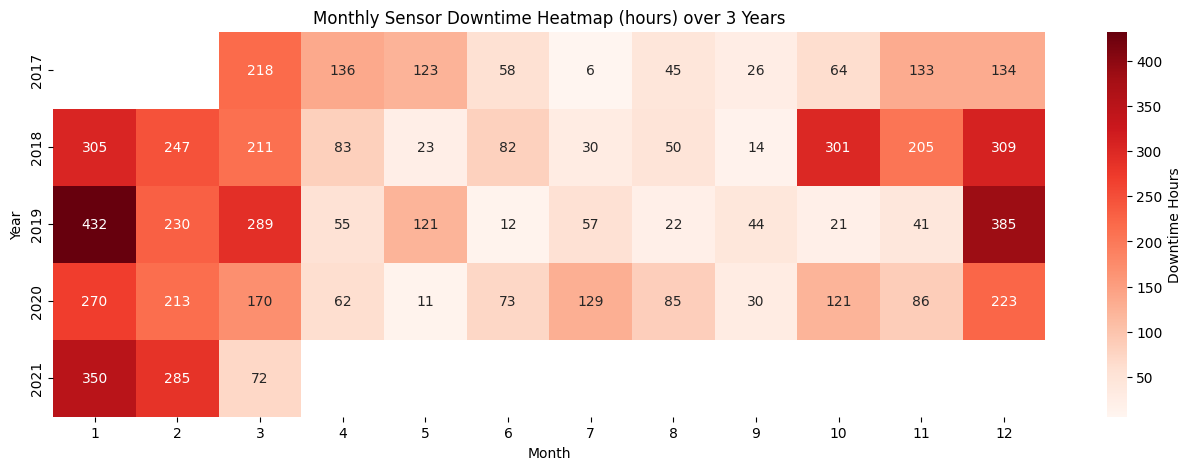

In [12]:
# Convert PeriodIndex back to a normal column for further processing
monthly_downtime = monthly_downtime.reset_index()
monthly_downtime["Year"] = monthly_downtime["local"].dt.year
monthly_downtime["Month"] = monthly_downtime["local"].dt.month

# Create a pivot table: rows = Year, columns = Month, values = downtime hours
heatmap_data = monthly_downtime.pivot(index="Year", columns="Month", values="sensor_down")


# Plot a heatmap to visualize downtime intensity by year and month
plt.figure(figsize=(16,5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Downtime Hours'})
plt.title("Monthly Sensor Downtime Heatmap (hours) over 3 Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [13]:
# Fill NaNs in clean_value using backward fill (bfill) up to 3 hours, then forward fill (ffill) up to 3 hours.
pm25_df["value_filled"] = pm25_df["clean_value"].bfill(limit=3).ffill(limit=3)

# Count remaining NaNs after filling
invalid_count = pm25_df["value_filled"].isna().sum()

print("Total count of Nan value in dataframe after filling:" , invalid_count)

print(pm25_df[["local","clean_value","value","parameter","value_filled"]].head())


Total count of Nan value in dataframe after filling: 2614
                      local  clean_value  value parameter  value_filled
1 2021-03-13 00:00:00+05:45         69.0   69.0      pm25          69.0
2 2021-03-12 23:00:00+05:45         69.0   69.0      pm25          69.0
5 2021-03-12 22:00:00+05:45         60.0   60.0      pm25          60.0
6 2021-03-12 21:00:00+05:45         58.0   58.0      pm25          58.0
9 2021-03-12 20:00:00+05:45         58.0   58.0      pm25          58.0


In [14]:
# Check if all consecutive timestamps are exactly 1 hour apart (returns True/False)
(pm25_df['local'].diff().dropna().abs() == pd.Timedelta(hours=1)).all()

# Ensure the data is sorted by time
pm25_df = pm25_df.sort_values('local').reset_index(drop=True)

# Find rows where the time difference is NOT 1 hour (potential gaps or irregularities)
pm25_df.loc[
    pm25_df['local'].diff().abs() != pd.Timedelta(hours=1),
    ['local']
].head()

# pm25_df.loc[pm25_df['local'].diff() != pd.Timedelta(hours=1), ['local']]



local
0    2017-03-03 05:00:00+05:45
138  2017-03-09 03:00:00+05:45
209  2017-03-12 03:00:00+05:45
516  2017-04-13 20:00:00+05:45
2822 2017-07-19 03:00:00+05:45

In [15]:
# Create lag features: PM2.5 from the previous 1, 2, 3, and (duplicated) 3 hours
# These will be used as inputs to prediction models
pm25_df['lag1'] = pm25_df['value_filled'].shift(1)
pm25_df['lag2'] = pm25_df['value_filled'].shift(2)
pm25_df['lag3'] = pm25_df['value_filled'].shift(3)
pm25_df['lag4'] = pm25_df['value_filled'].shift(3)


print("Before dropping the NaN from the lag features: \n")
print(pm25_df[["local","value_filled","lag1","lag2","lag3"]].head(10))


# Remove rows where lag features or target are NaN (these occur at the start of the series)
print("\n\nAfter dropping the NaN from the lag features: \n")
pm25_df = pm25_df.dropna(subset=["lag1","lag2","lag3","value_filled"])

# Keep only rows where the last 3 lags are truly 1, 2, and 3 hours apart
pm25_df = pm25_df[
    (pm25_df['local'] - pm25_df['local'].shift(1) == pd.Timedelta(hours=1)) &
    (pm25_df['local'] - pm25_df['local'].shift(2) == pd.Timedelta(hours=2)) &
    (pm25_df['local'] - pm25_df['local'].shift(3) == pd.Timedelta(hours=3))
]

print(pm25_df[["local","value_filled","lag1","lag2","lag3"]].head(10))


Before dropping the NaN from the lag features: 

                      local  value_filled  lag1  lag2  lag3
0 2017-03-03 05:00:00+05:45           NaN   NaN   NaN   NaN
1 2017-03-03 06:00:00+05:45           NaN   NaN   NaN   NaN
2 2017-03-03 07:00:00+05:45           NaN   NaN   NaN   NaN
3 2017-03-03 08:00:00+05:45           NaN   NaN   NaN   NaN
4 2017-03-03 09:00:00+05:45          72.1   NaN   NaN   NaN
5 2017-03-03 10:00:00+05:45          72.1  72.1   NaN   NaN
6 2017-03-03 11:00:00+05:45          72.1  72.1  72.1   NaN
7 2017-03-03 12:00:00+05:45          72.1  72.1  72.1  72.1
8 2017-03-03 13:00:00+05:45          48.0  72.1  72.1  72.1
9 2017-03-03 14:00:00+05:45          40.0  48.0  72.1  72.1


After dropping the NaN from the lag features: 

                       local  value_filled  lag1  lag2  lag3
10 2017-03-03 15:00:00+05:45          36.0  40.0  48.0  72.1
11 2017-03-03 16:00:00+05:45          48.5  36.0  40.0  48.0
12 2017-03-03 17:00:00+05:45          41.7  48.5  36.0  40

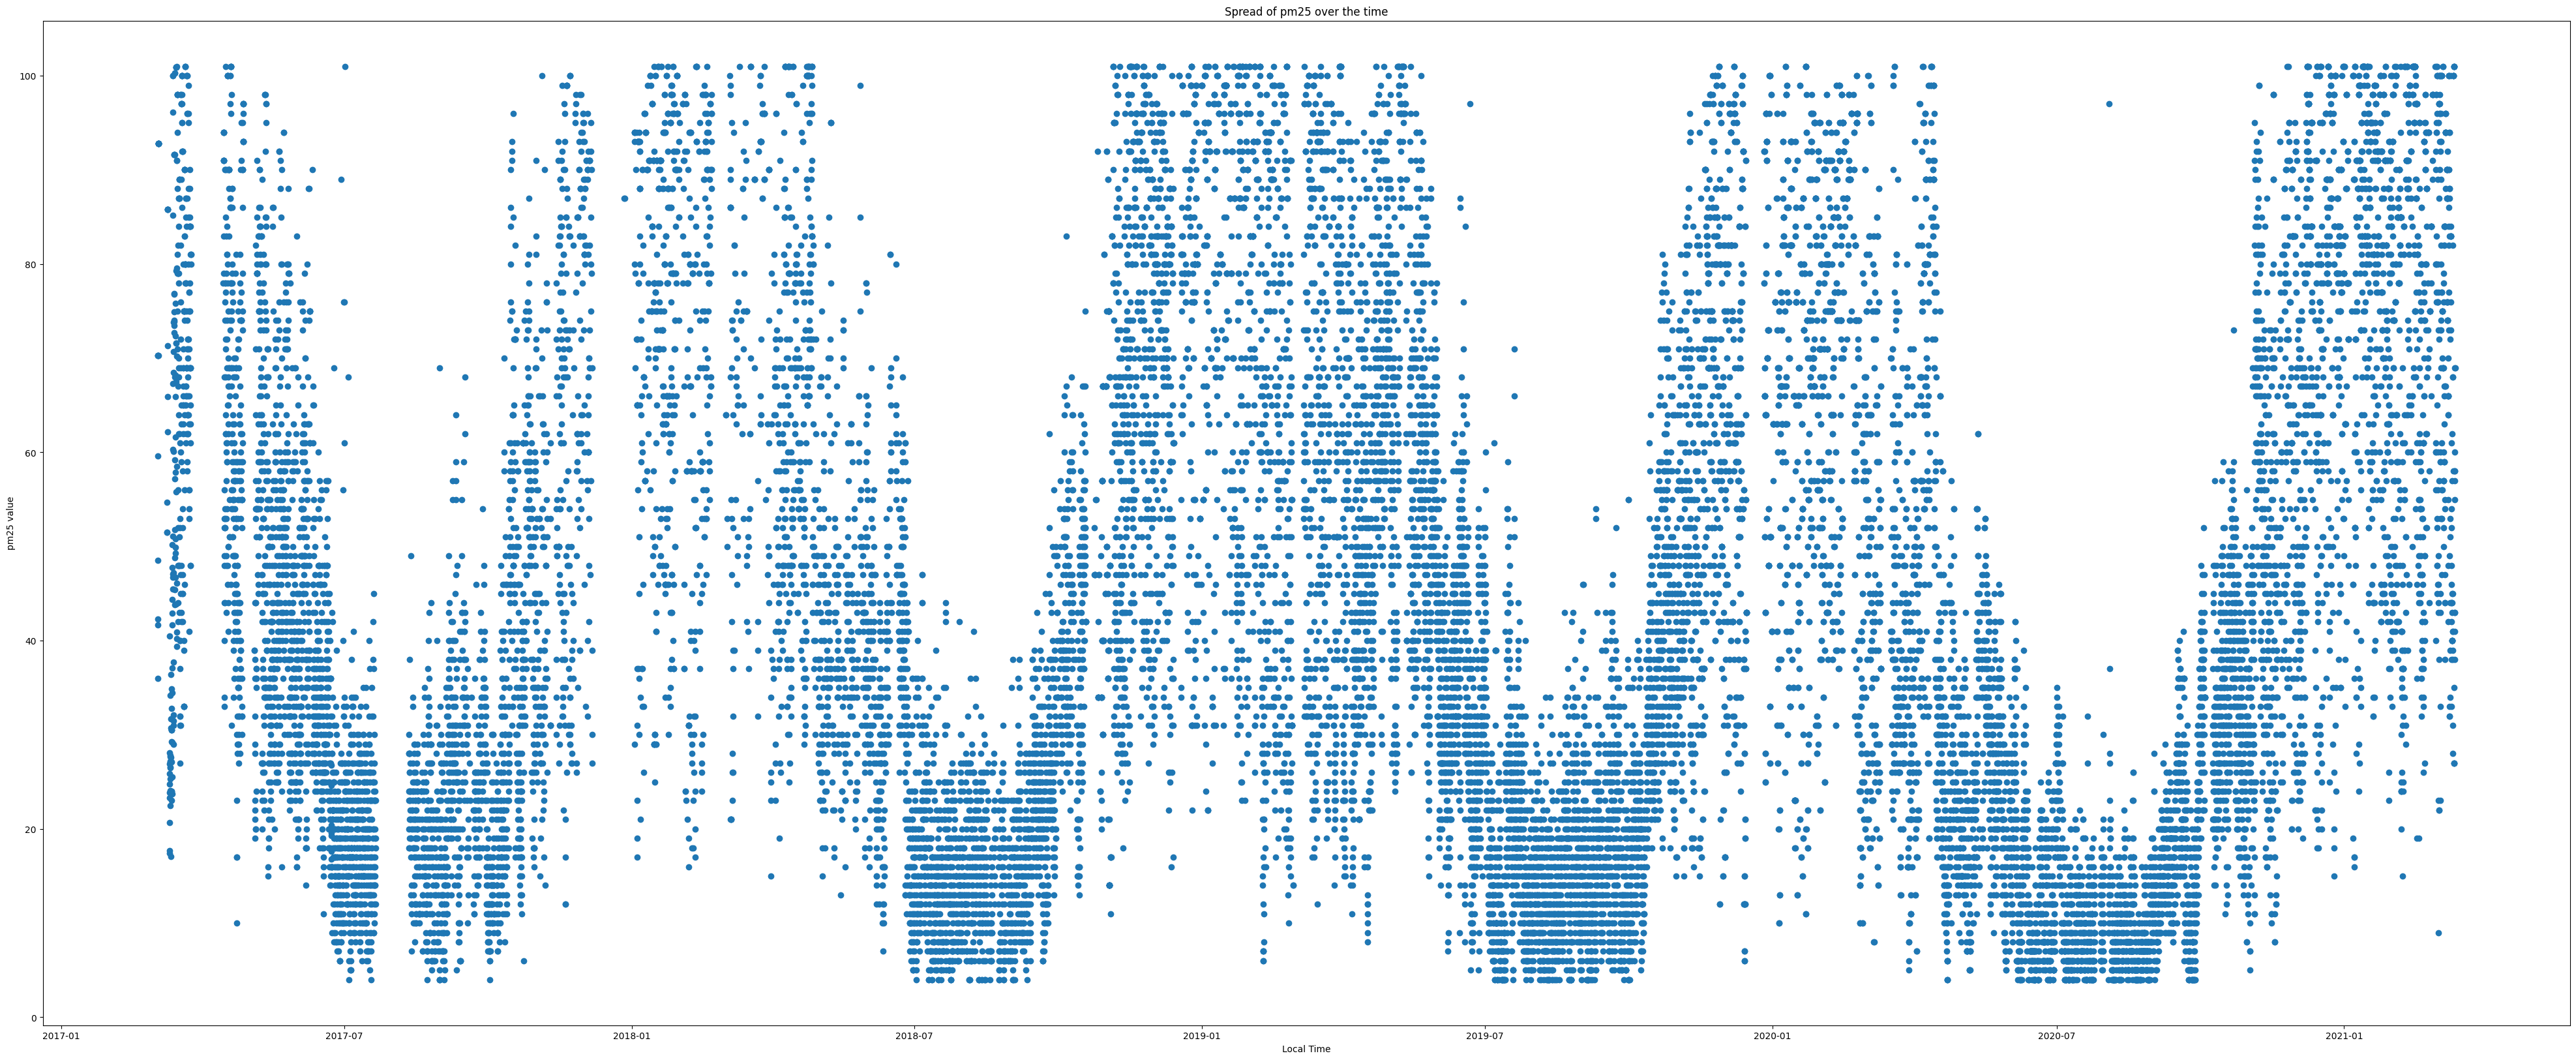

In [16]:
# Plot the time series using the filled values instead of raw values
plt.figure(figsize=(50,20))
plt.scatter(pm25_df["local"],pm25_df["value_filled"])
plt.title("Spread of pm25 over the time")
plt.xlabel("Local Time")
plt.ylabel("pm25 value")
plt.show()


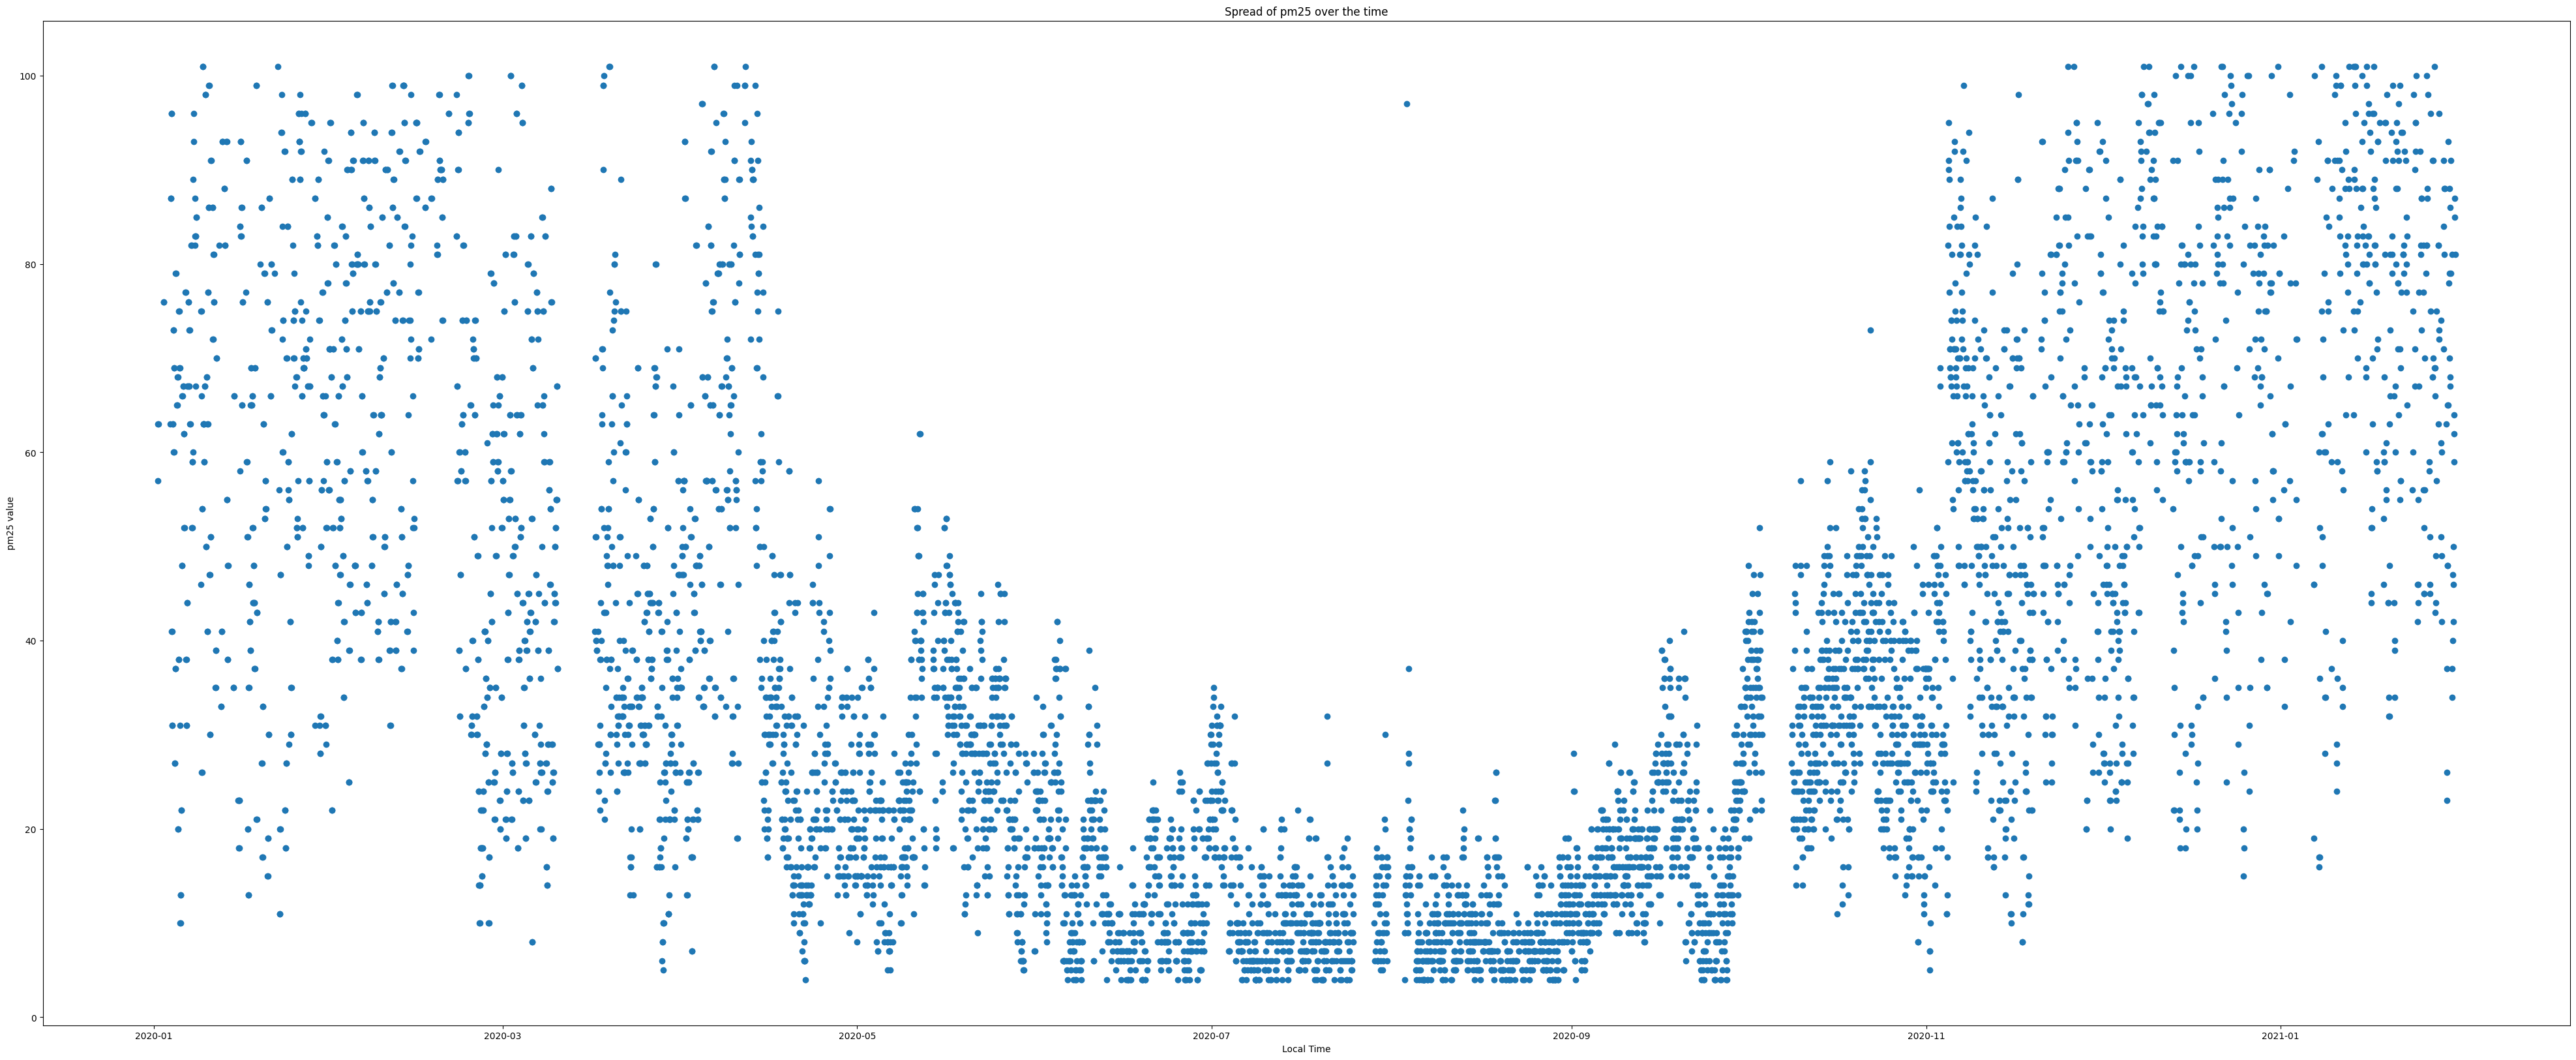

In [17]:
# Filter data for the COVID period: Jan 2020 to Jan 2021
covid_period = pm25_df[(pm25_df["local"] >= '2020-01-01') & (pm25_df["local"] <= '2021-01-31')]

# Visualize PM2.5 during the COVID period using cleaned values
plt.figure(figsize=(50,20))
plt.scatter(covid_period["local"], covid_period["clean_value"])
plt.title("Spread of pm25 over the time")
plt.xlabel("Local Time")
plt.ylabel("pm25 value")
plt.show()


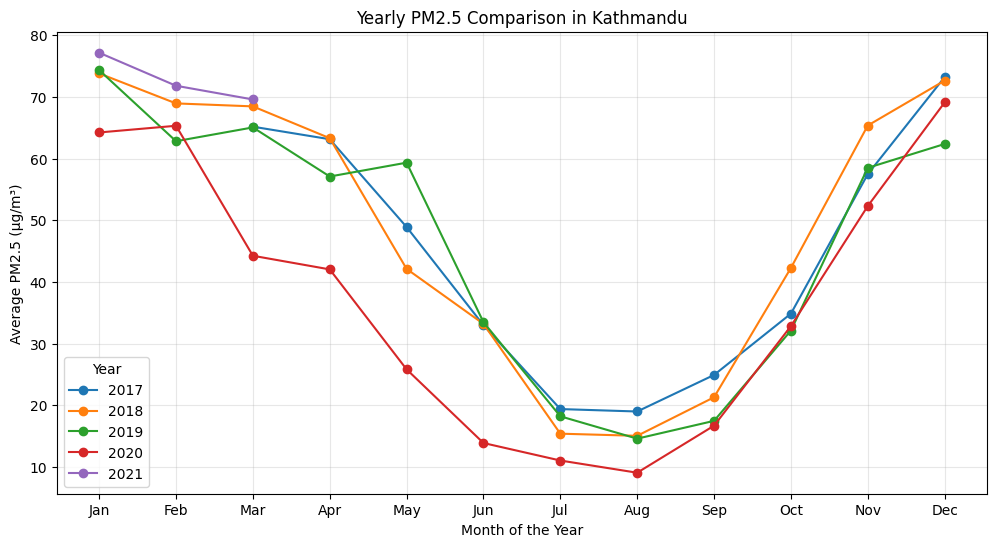

In [18]:

# Add year and month columns for longer-term trend analysis
pm25_df['year'] = pm25_df['local'].dt.year
pm25_df['month'] = pm25_df['local'].dt.month

# Compute monthly average PM2.5 for each year
yearly_trend = pm25_df.groupby(['year', 'month'])['value_filled'].mean().unstack(level=0)

# Plot yearly monthly curves to compare seasons across years
plt.figure(figsize=(12, 6))
yearly_trend.plot(ax=plt.gca(), marker='o')
plt.title("Yearly PM2.5 Comparison in Kathmandu")
plt.xlabel("Month of the Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(
    range(1, 13),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.legend(title="Year")
plt.grid(True, alpha=0.3)
plt.show()

/var/folders/5h/wdf3vc9s0cb3k4pj_zh03f300000gn/T/ipykernel_18542/3040548315.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = pm25_df.resample('M', on='local')['value_filled'].mean().reset_index()


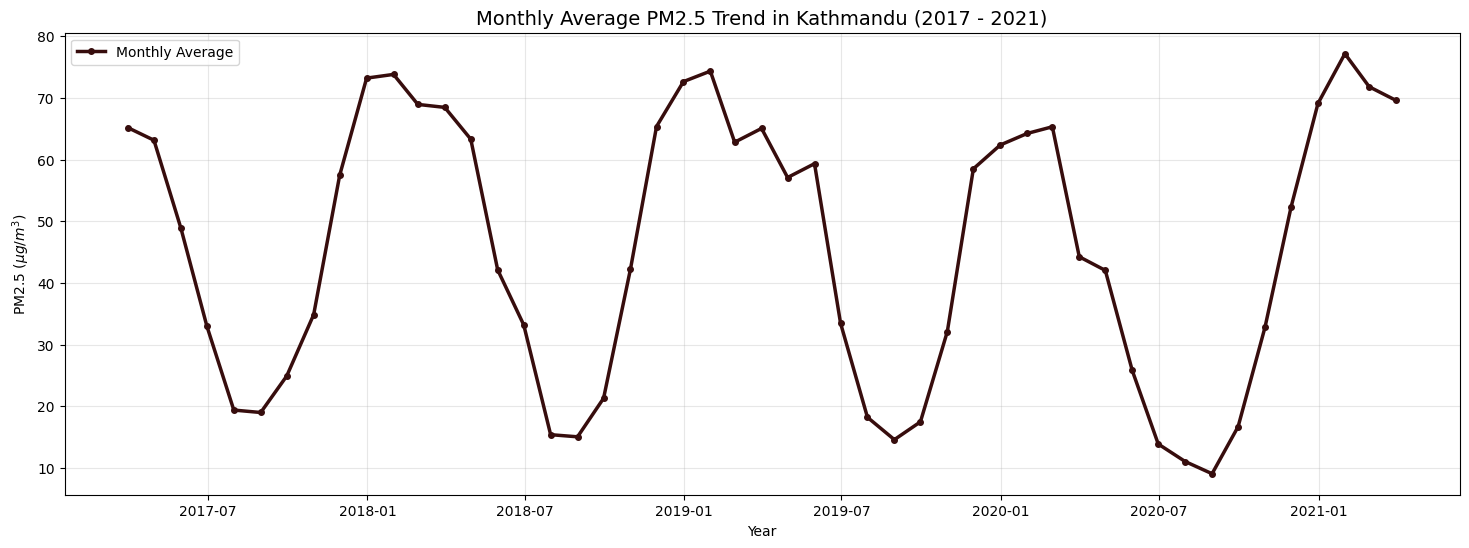

In [19]:
# Resample the full dataset to monthly frequency and take the mean PM2.5
monthly_trend = pm25_df.resample('M', on='local')['value_filled'].mean().reset_index()

# 2. Plot the smoothed line
plt.figure(figsize=(18, 6))

# Use a thicker line and markers to make the monthly points clear
plt.plot(monthly_trend['local'], monthly_trend['value_filled'], 
         color="#370d0d", linewidth=2.5, marker='o', markersize=4, label='Monthly Average')

plt.title("Monthly Average PM2.5 Trend in Kathmandu (2017 - 2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("PM2.5 ($µg/m^3$)")
plt.grid(True, alpha=0.3)

plt.legend()
plt.show()

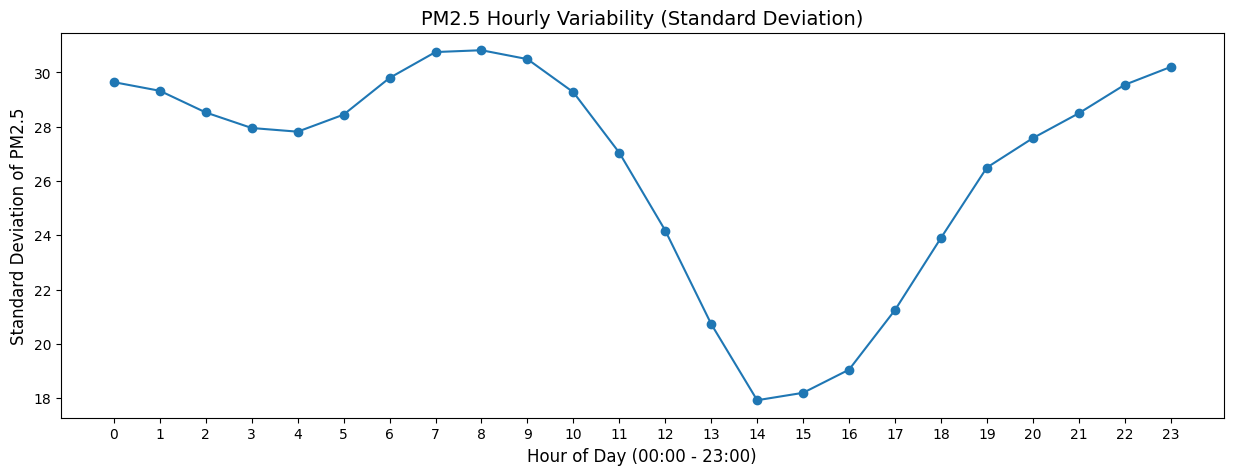

In [20]:
# Question : Which hours are most unpredictable?

pm25_df_hourly_var = pm25_df.groupby(pm25_df["local"].dt.hour)["value_filled"].std()
ax =  pm25_df_hourly_var.plot(kind='line', marker='o', figsize=(15, 5))
ax.set_title("PM2.5 Hourly Variability (Standard Deviation)", fontsize=14)
ax.set_xlabel("Hour of Day (00:00 - 23:00)", fontsize=12)
ax.set_ylabel("Standard Deviation of PM2.5", fontsize=12)
ax.set_xticks(range(0, 24))
plt.show()

--- Daily PM2.5 Means ---
day_type
weekday    44.910679
weekend    44.376522
Name: value_filled, dtype: float64
---------------------------



<Figure size 600x500 with 0 Axes>

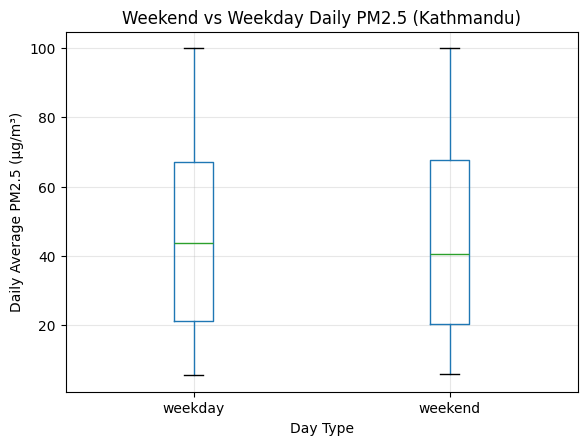

In [21]:
# Myth Buster : Is PM2.5 in Kathmandu significantly lower on weekends (Saturday) compared to weekdays?
pm25_df["day_type"] = pm25_df["local"].dt.dayofweek.apply(
    lambda x: "weekend" if x == 6 else "weekday"
)
daily_pm25 = (
    pm25_df
    .groupby([pm25_df["local"].dt.date, "day_type"])["value_filled"]
    .mean()
    .reset_index()
)

print("--- Daily PM2.5 Means ---")
print(daily_pm25.groupby("day_type")["value_filled"].mean())
print("---------------------------\n")


plt.figure(figsize=(6,5))
daily_pm25.boxplot(column="value_filled", by="day_type")

plt.title("Weekend vs Weekday Daily PM2.5 (Kathmandu)")
plt.suptitle("")
plt.xlabel("Day Type")
plt.ylabel("Daily Average PM2.5 (µg/m³)")
plt.grid(alpha=0.3)
plt.show()


In [22]:
# Split data into training (before 2020) and testing (after 2020-01-01)
train = pm25_df[pm25_df["local"] < "2020-01-01"]
test = pm25_df[pm25_df["local"] > "2020-01-01"]

# Features: lagged values; Target: current PM2.5
X_train = train[['lag1', 'lag2', 'lag3']]
y_train = train['value_filled']

X_test = test[['lag1', 'lag2', 'lag3']]
y_test = test['value_filled']

In [23]:
# from sklearn.model_selection import train_test_split

# # Define your features (X) and target (y) from the whole dataset
# X = pm25_df[['lag1', 'lag2', 'lag3']]
# y = pm25_df['value_filled']

# # Split randomly: 80% for training and 20% for testing
# # random_state ensures you get the same "random" split every time you run the code
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

# Initialize a simple linear regression model
linear_model = LinearRegression()

# Fit the model using lag features as predictors
linear_model.fit(X_train,y_train)

# Predict PM2.5 values on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics: MSE, MAE, R², and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("\nMSE: ",mse)
print("\nMAE: ",mae)
print("\nR2_Score: ",r2)
print("\nRMSE: ",rmse) 



MSE:  93.44491810501015

MAE:  5.954900142267806

R2_Score:  0.8919058581579206

RMSE:  9.666691166320053


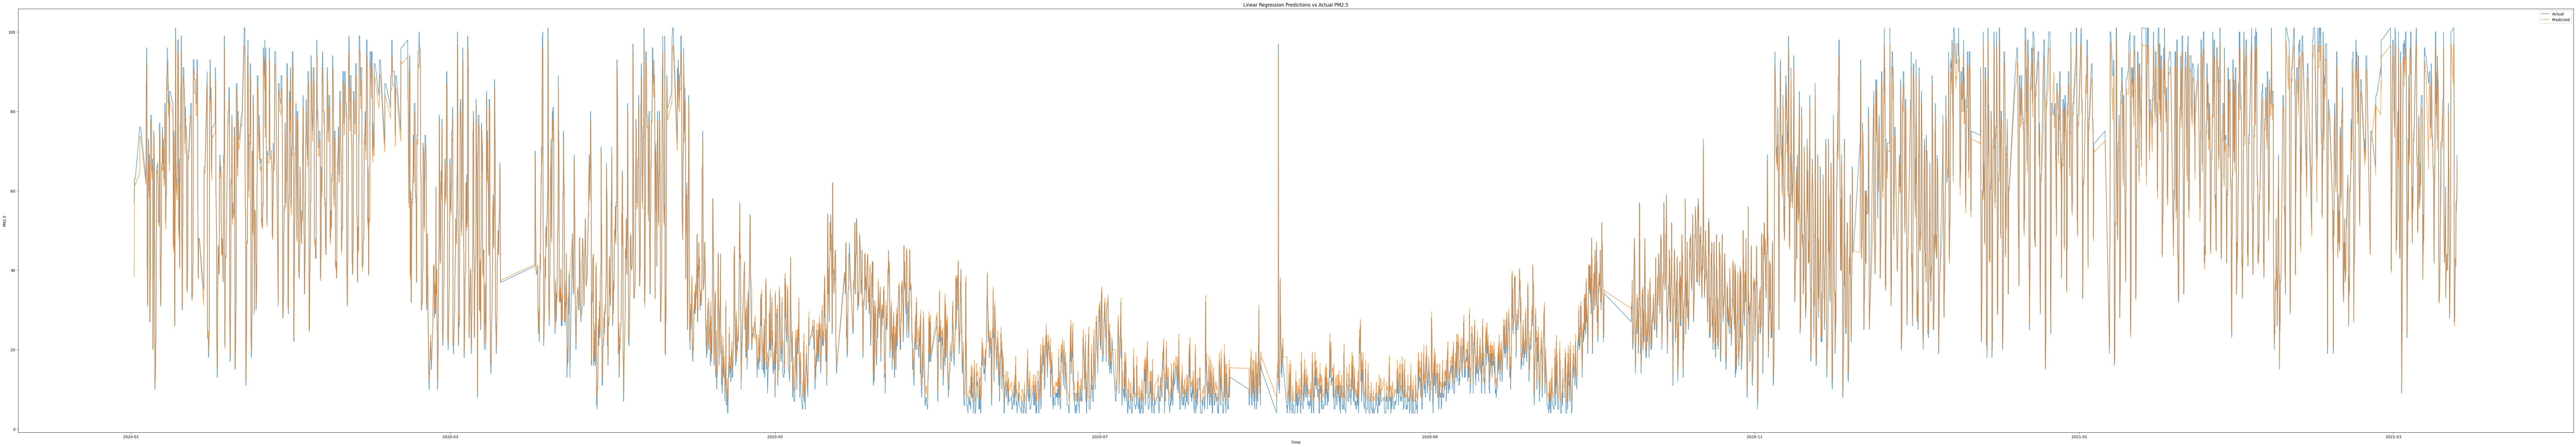

In [25]:
# Compare actual vs predicted PM2.5 over time for the test period
plt.figure(figsize=(120,20))
plt.plot(test['local'], y_test, label='Actual', alpha=0.7)
plt.plot(test['local'], y_pred, label='Predicted', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("Linear Regression Predictions vs Actual PM2.5")
plt.legend()
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Configure a Random Forest for regression
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
# Train the Random Forest model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute metrics for the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)


print("Random Forest Results")
print("RMSE:", rf_rmse)
print("MSE: ",rf_mse)
print("MAE: ",rf_mae)
print("R²:", rf_r2)


Random Forest Results
RMSE: 9.756541615858332
MSE:  95.1901043019755
MAE:  6.257682242720886
R²: 0.8898870816621927


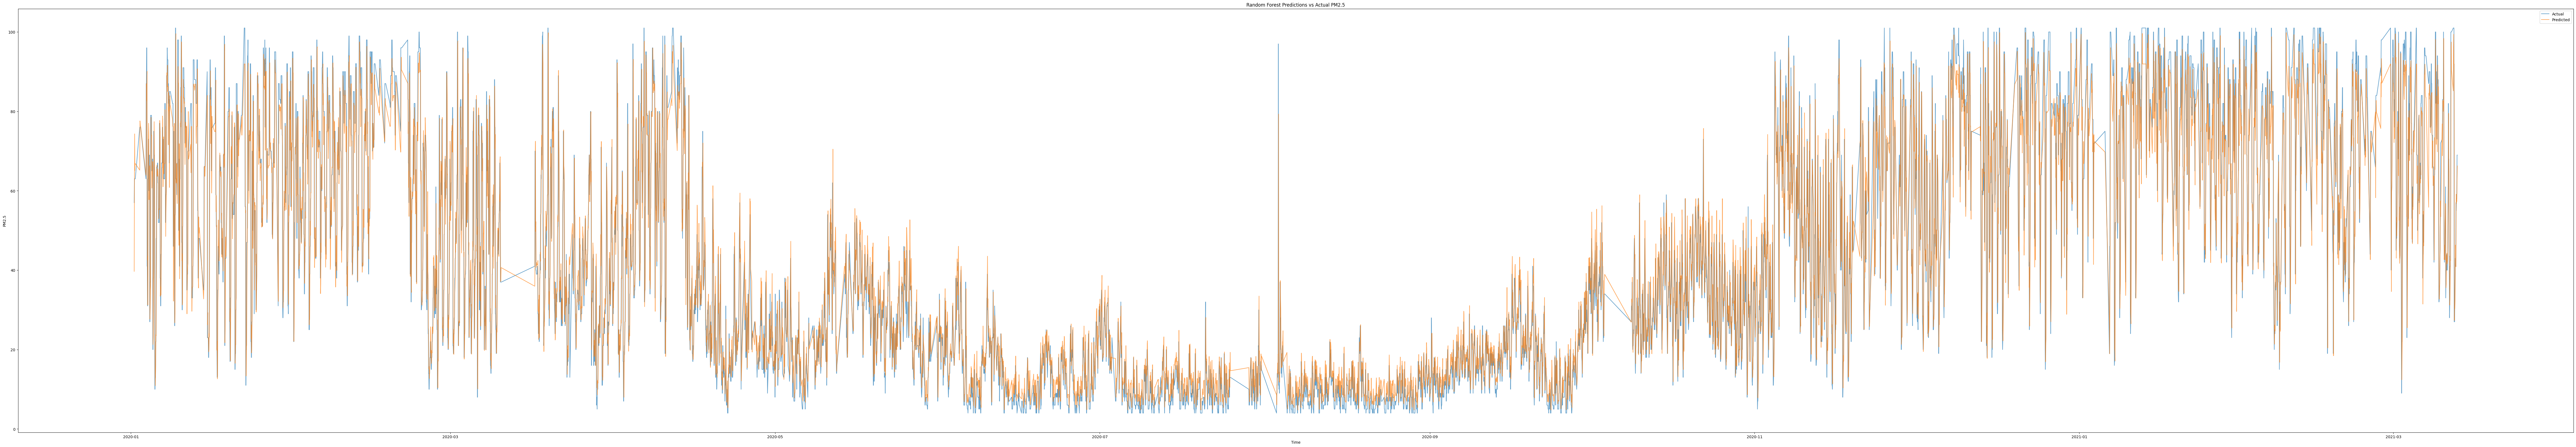

In [27]:
# Visual comparison of Random Forest predictions vs actual PM2.5 on the test period
plt.figure(figsize=(120,20))
plt.plot(test['local'], y_test, label='Actual', alpha=0.7)
plt.plot(test['local'], y_pred, label='Predicted', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("Random Forest Predictions vs Actual PM2.5")
plt.legend()
plt.show()
